In [4]:
#%% Import Libraries
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# multiclass classification
import pandas
import xgboost
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [5]:
#%% Getting the data
train_identity_df = pd.read_csv("C:/Users/tanzi/Documents/DataScience/Fraud/train_identity.csv")
train_transaction_df = pd.read_csv("C:/Users/tanzi/Documents/DataScience/Fraud/train_transaction.csv")

In [6]:
train_transaction_df.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000,82351.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387,814.946722
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,25.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,55.000000,160000.000000,160000.000000,160000.000000,55125.000000,55125.00000,55125.000000,104060.000000,104060.000000,104060.000000


In [7]:
train_transaction_df.head(15)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.500,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.000,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.000,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.000,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2987005,0,86510,49.000,W,5937,555.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2987006,0,86522,159.000,W,12308,360.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987007,0,86529,422.500,W,12695,490.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2987008,0,86535,15.000,H,2803,100.0,150.0,visa,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2987009,0,86536,117.000,W,17399,111.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


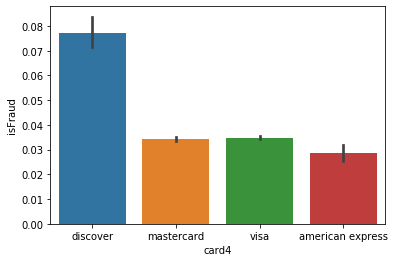

In [8]:
sns.barplot(x='card4', y='isFraud', data=train_transaction_df)

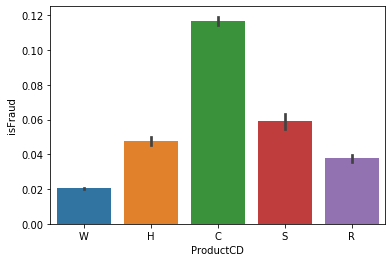

In [9]:
sns.barplot(x='ProductCD', y='isFraud', data=train_transaction_df)

In [10]:
train_transaction_df['TransactionAmt'].describe()

count    590540.000000
mean        135.027176
std         239.162522
min           0.251000
25%          43.321000
50%          68.769000
75%         125.000000
max       31937.391000
Name: TransactionAmt, dtype: float64

In [11]:
tt_df = train_transaction_df[train_transaction_df.columns.values[1:17]]
meanTA = tt_df['TransactionAmt'].mean()
stdTA = tt_df['TransactionAmt'].std()
CF = meanTA + 3*stdTA
isBigger = tt_df['TransactionAmt'] >= CF
tt_df['isBigger'] = isBigger
tt_df.isBigger = tt_df.isBigger.astype(int)
tt_df.head(15)

C:\Users\tanzi\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\tanzi\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,isBigger
0,0,86400,68.500,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,0
1,0,86401,29.000,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,0
2,0,86469,59.000,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,0
3,0,86499,50.000,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,0
4,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,0
5,0,86510,49.000,W,5937,555.0,150.0,visa,226.0,debit,272.0,87.0,36.0,NaN,gmail.com,NaN,0
6,0,86522,159.000,W,12308,360.0,150.0,visa,166.0,debit,126.0,87.0,0.0,NaN,yahoo.com,NaN,0
7,0,86529,422.500,W,12695,490.0,150.0,visa,226.0,debit,325.0,87.0,NaN,NaN,mail.com,NaN,0
8,0,86535,15.000,H,2803,100.0,150.0,visa,226.0,debit,337.0,87.0,NaN,NaN,anonymous.com,NaN,0
9,0,86536,117.000,W,17399,111.0,150.0,mastercard,224.0,debit,204.0,87.0,19.0,NaN,yahoo.com,NaN,0


In [12]:
round(tt_df[tt_df.isBigger == 1].isFraud.sum()/tt_df[tt_df.isBigger == 1].isFraud.count(),3)*100

5.3

In [13]:
round(tt_df[tt_df.isBigger == 0].isFraud.sum()/tt_df[tt_df.isBigger == 0].isFraud.count(),3)*100

3.5000000000000004

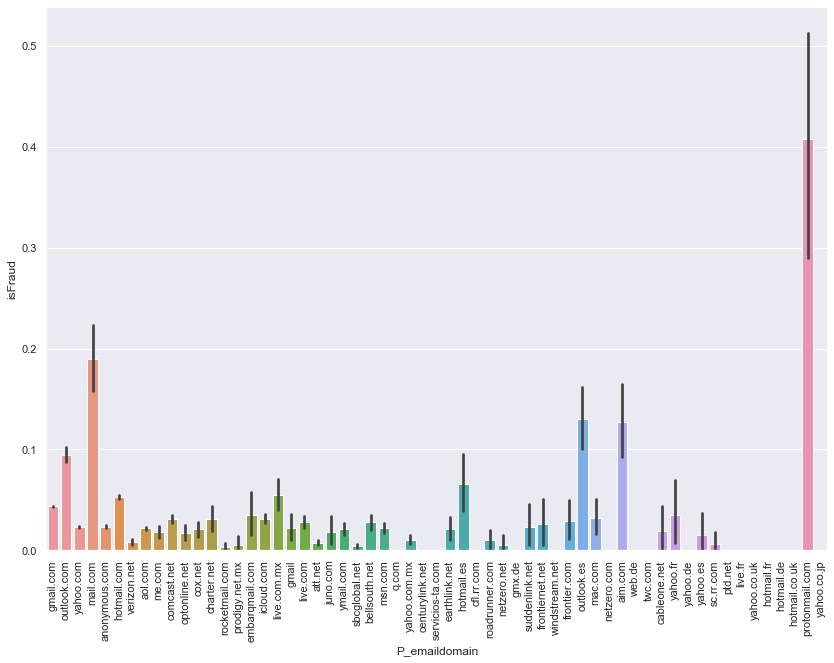

In [14]:
sns.set(rc={'figure.figsize':(14,10)})
g = sns.barplot(x='P_emaildomain', y='isFraud', data=tt_df)
for item in g.get_xticklabels():
    item.set_rotation(90)

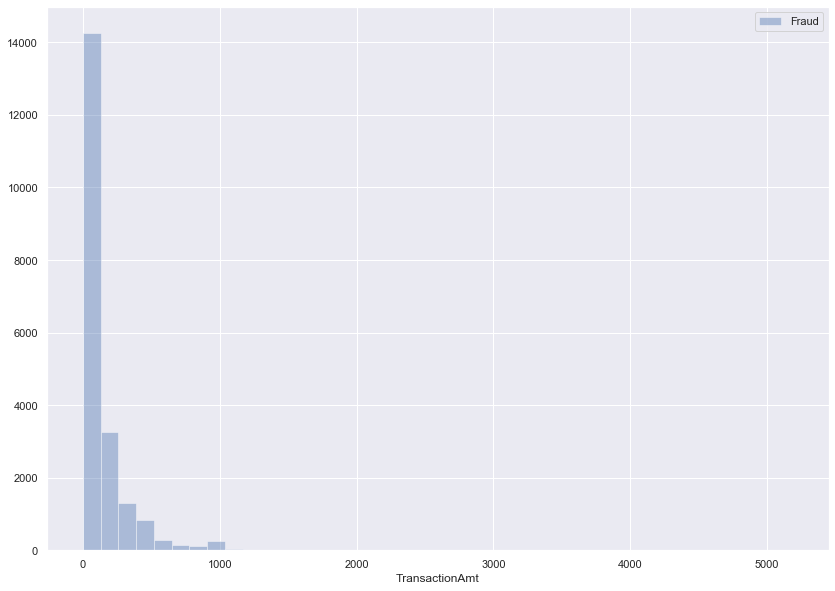

In [15]:
ax = sns.distplot(tt_df[tt_df['isFraud'] == 1].TransactionAmt.dropna(), bins =40, kde = False, label = 'Fraud')
ax.legend()

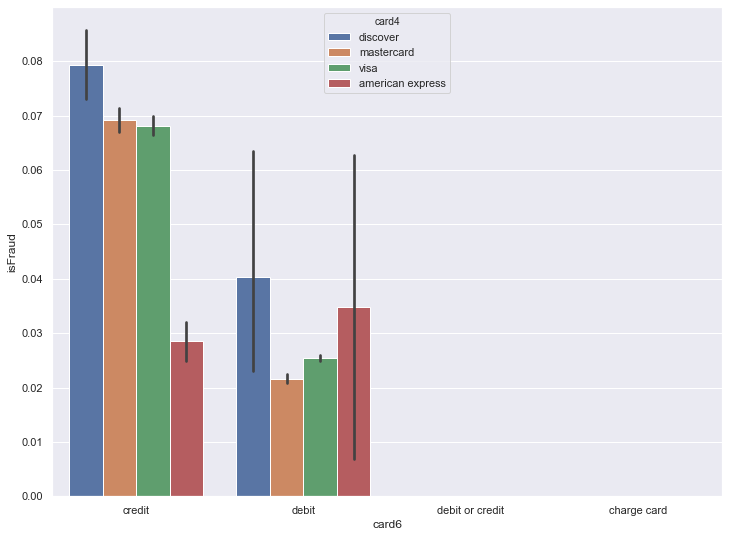

In [16]:
sns.set(rc={'figure.figsize':(12,9)})
sns.barplot(x='card6', y='isFraud', hue = 'card4', data=tt_df)

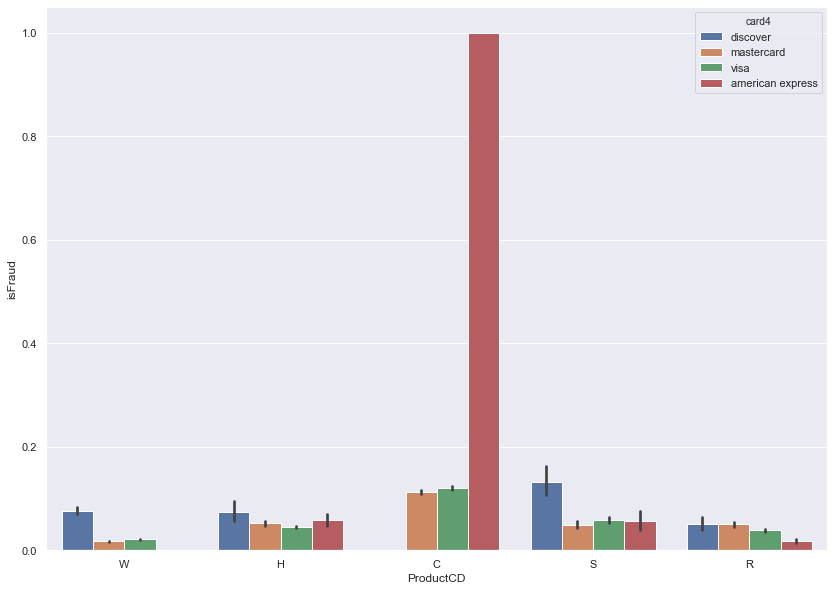

In [17]:
sns.set(rc={'figure.figsize':(14,10)})
sns.barplot(x='ProductCD', y='isFraud', hue = 'card4', data=tt_df)

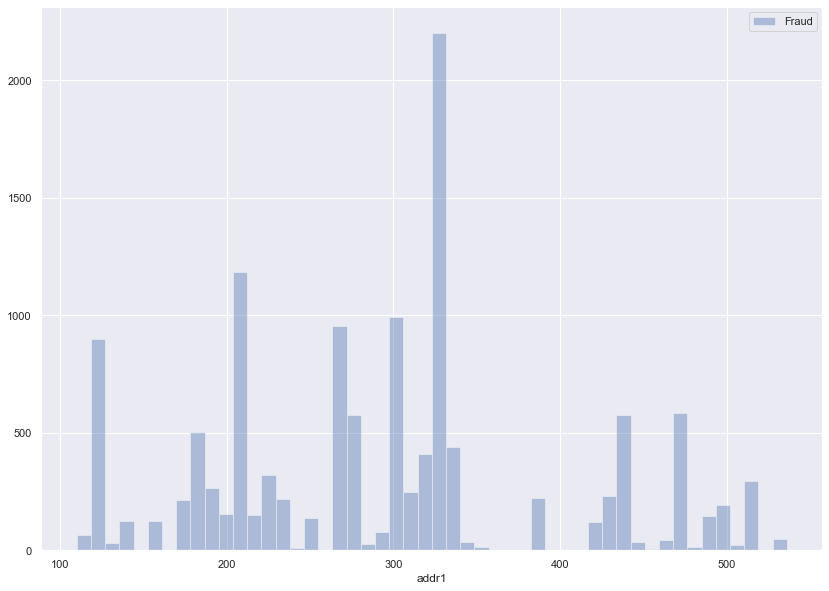

In [18]:
ax = sns.distplot(tt_df[tt_df['isFraud'] == 1].addr1.dropna(), bins =50, kde = False, label = 'Fraud')
ax.legend()

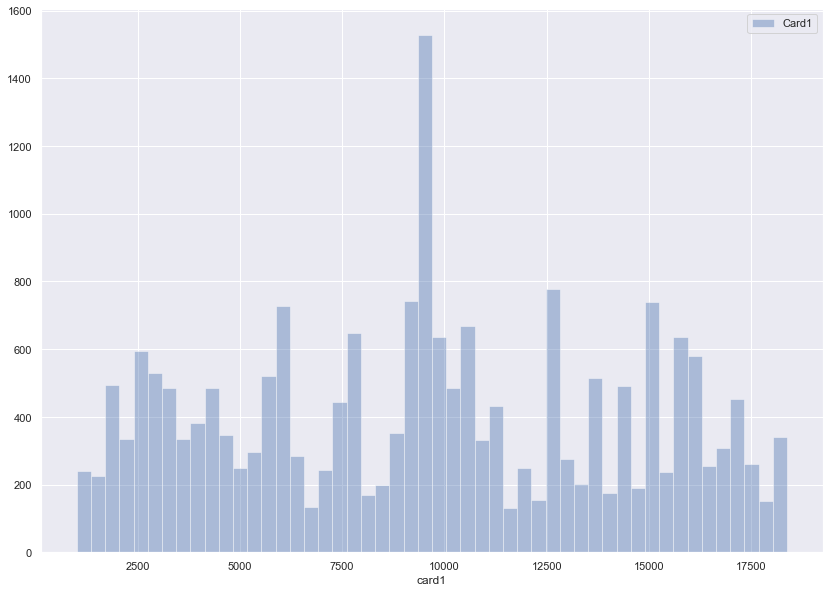

In [19]:
ax = sns.distplot(tt_df[tt_df['isFraud'] == 1].card1.dropna(), bins =50, kde = False, label = 'Card1')
ax.legend()

In [20]:
tt_df.describe()

,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,isBigger
count,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,238269.000000,37627.000000,590540.000000
mean,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,118.502180,231.855423,0.017091
std,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,371.872026,529.053494,0.129611
min,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,0.000000,0.000000,0.000000
25%,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,3.000000,7.000000,0.000000
50%,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,8.000000,37.000000,0.000000
75%,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,24.000000,206.000000,0.000000
max,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,10286.000000,11623.000000,1.000000


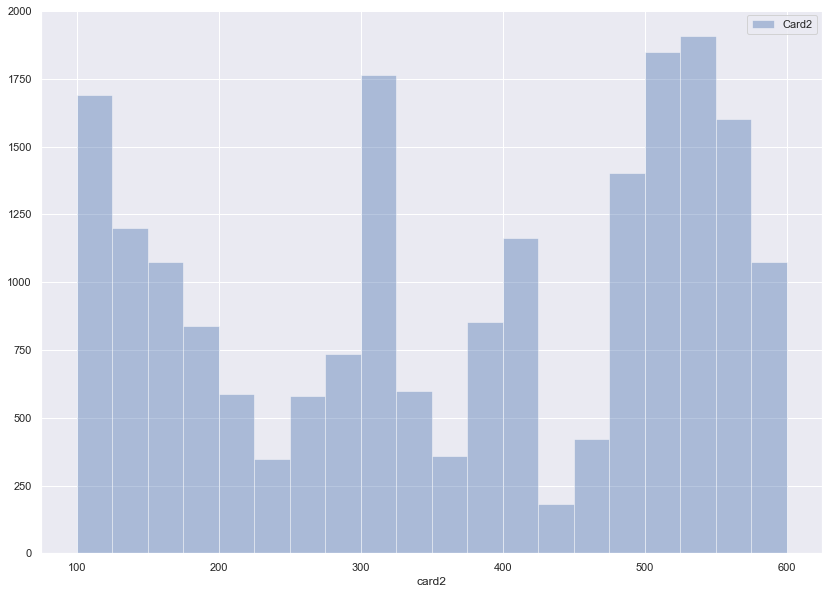

In [21]:
ax = sns.distplot(tt_df[tt_df['isFraud'] == 1].card2.dropna(), bins =20, kde = False, label = 'Card2')
ax.legend()

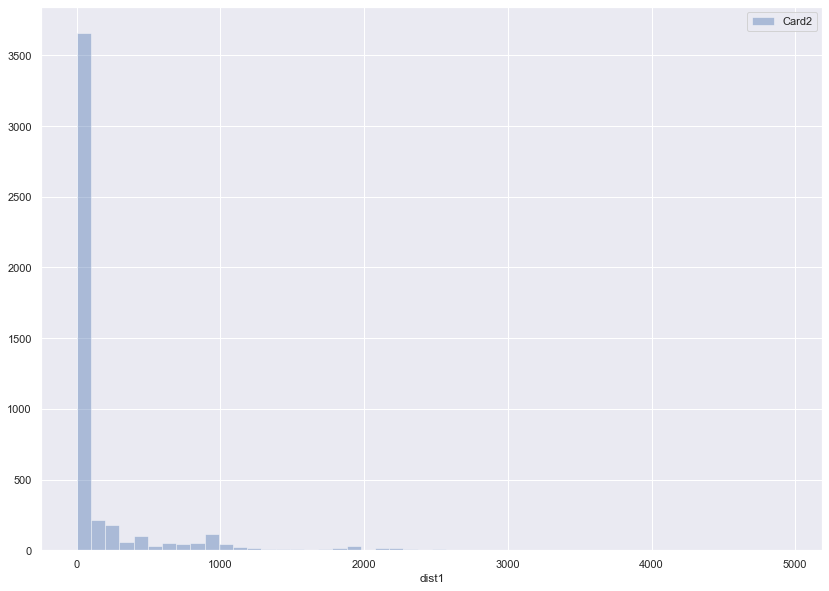

In [22]:
ax = sns.distplot(tt_df[tt_df['isFraud'] == 1].dist1.dropna(), bins =50, kde = False, label = 'Card2')
ax.legend()

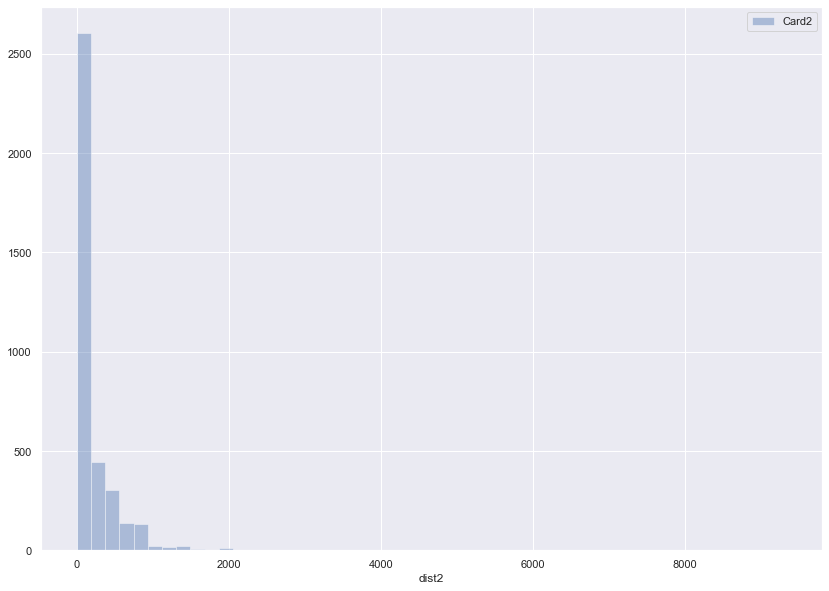

In [23]:
ax = sns.distplot(tt_df[tt_df['isFraud'] == 1].dist2.dropna(), bins =50, kde = False, label = 'Card2')
ax.legend()

In [24]:
tt_df.columns.values

array(['isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1',
       'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2',
       'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'isBigger'],
      dtype=object)

In [25]:
train_df = tt_df.drop(['TransactionDT','card2','card3','addr2','dist2','R_emaildomain','isBigger'], axis = 1)
train_df.head(15)

,isFraud,TransactionAmt,ProductCD,card1,card4,card5,card6,addr1,dist1,P_emaildomain
0,0,68.500,W,13926,discover,142.0,credit,315.0,19.0,NaN
1,0,29.000,W,2755,mastercard,102.0,credit,325.0,NaN,gmail.com
2,0,59.000,W,4663,visa,166.0,debit,330.0,287.0,outlook.com
3,0,50.000,W,18132,mastercard,117.0,debit,476.0,NaN,yahoo.com
4,0,50.000,H,4497,mastercard,102.0,credit,420.0,NaN,gmail.com
5,0,49.000,W,5937,visa,226.0,debit,272.0,36.0,gmail.com
6,0,159.000,W,12308,visa,166.0,debit,126.0,0.0,yahoo.com
7,0,422.500,W,12695,visa,226.0,debit,325.0,NaN,mail.com
8,0,15.000,H,2803,visa,226.0,debit,337.0,NaN,anonymous.com
9,0,117.000,W,17399,mastercard,224.0,debit,204.0,19.0,yahoo.com


In [26]:
codes = {"W": 0, "H": 1, "C": 2, "S": 3, "R": 4}
fNA = 5
for dataset in [train_df]:
    dataset['ProductCD'] = dataset['ProductCD'].map(codes)
    dataset['ProductCD'] = dataset['ProductCD'].fillna(fNA)
train_df['ProductCD'].isna().sum()

0

In [27]:
train_df.card4.unique()

array(['discover', 'mastercard', 'visa', 'american express', nan],
      dtype=object)

In [28]:
codes = {"discover": 0, "mastercard": 1, "visa": 2, "american express": 3}
fNA = 4
for dataset in [train_df]:
    dataset['card4'] = dataset['card4'].map(codes)
    dataset['card4'] = dataset['card4'].fillna(fNA)
train_df['card4'].isna().sum()

0

In [29]:
train_df.card6.unique()

array(['credit', 'debit', nan, 'debit or credit', 'charge card'],
      dtype=object)

In [30]:
types = {"credit": 0, "debit": 1, "debit or credit": 2, "charge card": 3}
fNA = 4
for dataset in [train_df]:
    dataset['card6'] = dataset['card6'].map(codes)
    dataset['card6'] = dataset['card6'].fillna(fNA)
train_df['card6'].isna().sum()

0

In [31]:
train_df.P_emaildomain.unique()

array([nan, 'gmail.com', 'outlook.com', 'yahoo.com', 'mail.com',
       'anonymous.com', 'hotmail.com', 'verizon.net', 'aol.com', 'me.com',
       'comcast.net', 'optonline.net', 'cox.net', 'charter.net',
       'rocketmail.com', 'prodigy.net.mx', 'embarqmail.com', 'icloud.com',
       'live.com.mx', 'gmail', 'live.com', 'att.net', 'juno.com',
       'ymail.com', 'sbcglobal.net', 'bellsouth.net', 'msn.com', 'q.com',
       'yahoo.com.mx', 'centurylink.net', 'servicios-ta.com',
       'earthlink.net', 'hotmail.es', 'cfl.rr.com', 'roadrunner.com',
       'netzero.net', 'gmx.de', 'suddenlink.net', 'frontiernet.net',
       'windstream.net', 'frontier.com', 'outlook.es', 'mac.com',
       'netzero.com', 'aim.com', 'web.de', 'twc.com', 'cableone.net',
       'yahoo.fr', 'yahoo.de', 'yahoo.es', 'sc.rr.com', 'ptd.net',
       'live.fr', 'yahoo.co.uk', 'hotmail.fr', 'hotmail.de',
       'hotmail.co.uk', 'protonmail.com', 'yahoo.co.jp'], dtype=object)

In [51]:
# encode string class values as integers
Y = train_df['P_emaildomain']
Y = Y.fillna('special.com')
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(Y)
label_encoded_y = label_encoder.transform(Y)
train_df['P_emaildomain'] = label_encoded_y
train_df.head(15)
train_df.shape[1]

10

In [ ]:
meanTA = train_df['TransactionAmt'].mean()
for dataset in [train_df]:
    dataset['TransactionAmt'] = dataset['TransactionAmt'].fillna(meanTA)
train_df['P_emaildomain'].isna().sum()

In [ ]:
meanC1 = train_df['card1'].mean()
for dataset in [train_df]:
    dataset['card1'] = dataset['card1'].fillna(meanC1)
train_df['card1'].isna().sum()

In [ ]:
meanC5 = train_df['card5'].mean()
for dataset in [train_df]:
    dataset['card5'] = dataset['card5'].fillna(meanC1)
train_df['card5'].isna().sum()

In [ ]:
meanA1 = train_df['addr1'].mean()
for dataset in [train_df]:
    dataset['addr1'] = dataset['addr1'].fillna(meanA1)
train_df['addr1'].isna().sum()

In [ ]:
meanD1 = train_df['dist1'].mean()
for dataset in [train_df]:
    dataset['dist1'] = dataset['dist1'].fillna(meanD1)
train_df['dist1'].isna().sum()

In [ ]:
train_df.head(10)

In [ ]:
train_df.isna().sum()